# Restful Open Weathermap API

In this notebook, we retrieve the hourly temperatue of san diego over 2013 and plot it.  We use the restful API for openweathermap.org.

In [1]:
%pylab inline
import requests
import datetime 

Populating the interactive namespace from numpy and matplotlib


The [requests](https://3.python-requests.org/) library is a simple to use python library for executing http commands over the internet.  

For example, we can create an http get command to download a website and then render it as html in our notebook.

In [2]:
req = requests.get("http://m.xkcd.com/")
print(type(req))
req.cookies.keys()

<class 'requests.models.Response'>


[]

In [3]:
from IPython.display import HTML
HTML(req.text)

Due to the prevelance of HTTP, many webservices now offer [Restful APIs](http://en.wikipedia.org/wiki/Representational_state_transfer) which are accessed via HTTP requests and return XML or JSON formatted data output.  A list of APIs is listed at [Programable Web](http://www.programmableweb.com/).  In additon, many developers of internal apps utilize the restful concept to ease integration of apps.

One easy to understand Restful API is the [Open Weather Map](https://openweathermap.org) API.  We will use this API to download the daily temperature of San Diego from January 1, 2013 through December 31, 2013 to give an example of the usage of such an API.

### Open Weather Map

As a first step we query the current weather in San Diego to see what the output looks like and get the city id for the historical lookup.  We use the request object's json method to convert the json output to a python Map which we can easily process.

To do this we perform a http get on the URL **http://api.openweathermap.org/data/2.5/weather** which is the base url for the Open Weather Map's current weather resful API.  We pass the get parameter **q=San%20Diego,us** to specify our city.  %20 is used to encode space in the url


In [4]:
import weatherkey
key=weatherkey.getkey()


In [11]:
import json
base_url = "http://api.openweathermap.org/data/2.5/weather"
url=base_url+"?q=San Diego,us&id=%s&APPID=%s"%('yoavfreund',key)
print(url)
req = requests.get(url)
output = req.json()
output

http://api.openweathermap.org/data/2.5/weather?q=San Diego,us&id=yoavfreund&APPID=ed39fd905c78acb78ef76eecab13470e


{'coord': {'lon': -117.16, 'lat': 32.72},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 291.97,
  'pressure': 1020,
  'humidity': 64,
  'temp_min': 289.82,
  'temp_max': 294.26},
 'visibility': 16093,
 'wind': {'speed': 3.6, 'deg': 340},
 'clouds': {'all': 75},
 'dt': 1573845222,
 'sys': {'type': 1,
  'id': 5771,
  'country': 'US',
  'sunrise': 1573827523,
  'sunset': 1573865278},
 'timezone': -28800,
 'id': 5391811,
 'name': 'San Diego',
 'cod': 200}

From here we can see that the city id for san diego (the "id" field) is 5391811.  We can now use open weather map's [Histrocial Data API](http://openweathermap.org/history) to download san diego data.  Lets try pulling the first forecast data for san diego.  Here are the parameters we pass:

* Base URL: http://api.openweathermap.org/data/2.5/forecast?
* id - the city id - 5391811
* APPID - the *API Key* for sai's account - 27c3349531eb36c4de11804df6a8374e

**This API Key might expired** -- Figure out how to obtain a new key for yourself and then use it to run the code below.

**Please follow the instructions in https://openweathermap.org/appid for getting API key for open weather API**


This gives us this URL: **http://api.openweathermap.org/data/2.5/forecast?id=5391811&APPID=27c3349531eb36c4de11804df6a8374e**

In [6]:
#http://history.openweathermap.org/data/2.5/history/city?q={city ID},{country code}&type=hour&start={start}&cnt={cnt}
query_url="id=5391811&APPID=27c3349531eb36c4de11804df6a8374e"
base_url='http://api.openweathermap.org/data/2.5/forecast?'
print(base_url+query_url)
req = requests.get(base_url+query_url)
req.json()

http://api.openweathermap.org/data/2.5/forecast?id=5391811&APPID=27c3349531eb36c4de11804df6a8374e


{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1573851600,
   'main': {'temp': 294.33,
    'temp_min': 294.06,
    'temp_max': 294.33,
    'pressure': 1016,
    'sea_level': 1016,
    'grnd_level': 996,
    'humidity': 51,
    'temp_kf': 0.27},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 1},
   'wind': {'speed': 3.09, 'deg': 308},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-11-15 21:00:00'},
  {'dt': 1573862400,
   'main': {'temp': 291.09,
    'temp_min': 290.89,
    'temp_max': 291.09,
    'pressure': 1015,
    'sea_level': 1015,
    'grnd_level': 996,
    'humidity': 72,
    'temp_kf': 0.2},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03n'}],
   'clouds': {'all': 50},
   'wind': {'speed': 3.47, 'deg': 300},
   'sys': {'pod': 'n'},
   'dt_txt': '2019-11-16 00:00:00'},
  {'dt': 1573873200,
   'main': {'temp': 289.98,
    'temp_min': 289

In [7]:
datetime.datetime.fromtimestamp(req.json()['list'][0]["dt"])

datetime.datetime(2019, 11, 15, 13, 0)

In [8]:
req.json()['list'][0]

{'dt': 1573851600,
 'main': {'temp': 294.33,
  'temp_min': 294.06,
  'temp_max': 294.33,
  'pressure': 1016,
  'sea_level': 1016,
  'grnd_level': 996,
  'humidity': 51,
  'temp_kf': 0.27},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'clouds': {'all': 1},
 'wind': {'speed': 3.09, 'deg': 308},
 'sys': {'pod': 'd'},
 'dt_txt': '2019-11-15 21:00:00'}

From here we can see that the temperature is located at req.json()["list"][0]["main"]["temp"].  Interestingly, we also see the temperature is reported in kelvin, which can be converted to Fahrenheit using $F=(K - 273.15)* 1.8000+ 32.00$.


Now we'll loop through from the start period to the end of the year, adding 86400 (the number of seconds in 24 hours) to the time stamp each time.  We'll append the temperature recieved to a list "temp" for us to plot later.

Also note that some times there is no measurement for a day, to do this we check if ["list"] is not empty before extracting main/temp from it.  If it is empty we append None.

In [9]:
temp = []; time = []


for i in req.json()["list"]:
    #print(i)
    if len(i) > 0:
        K = i["main"]["temp"]
        F = (K - 273.15)* 1.8000+ 32.00
        temp.append(F)
        time.append(datetime.datetime.fromtimestamp(i["dt"]))
    else:
        temp.append(None)
        time.append(None)


# time = 1573754400
# for i in range(365):
#     if i%10 == 0:
#         print(i)
#     req = requests.get("http://api.openweathermap.org/data/2.5/history/city?id=5391811&type=day&start=" + str(time) + "&cnt=1&APPID=dd9abf3c45c153e11a6e11f0d12391aa&type=day")
#     time = time + 86400
#     print(req.json())
#     data = req.json()["list"]
#     if len(data) > 0:
#         K = data[0]["main"]["temp"]
#         F = (K - 273.15)* 1.8000+ 32.00
#         temp.append(F)
#     else:
#         temp.append(None)

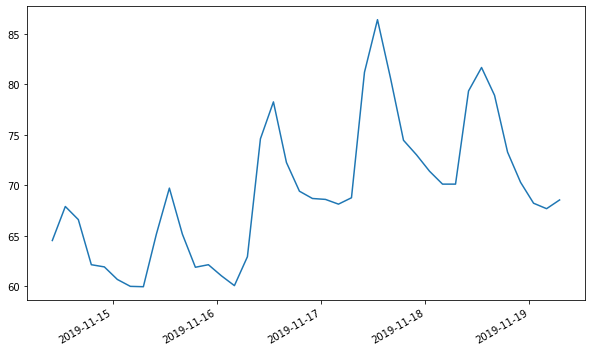

In [78]:
plt.figure(figsize = (10,6))
plt.plot(time, temp)
plt.gcf().autofmt_xdate();

There is obviously a lot more to learn about Restful API's, however this should provide a simple example of what they are and how to use them.  Explore the programmable web website to see the vast array of api's availible.

**Exercise**
Look at the programmable web website and find an API that interests you.  Use the restful API to query some data and extract a meaningful field.  If the API provides time series Data, plot the field over time.